## Домашнее задание по теме Градиентный бустинг.

## Часть 1. EDA

1) В качестве тестовых данных решила выбрать датасет с ресурса [kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) с данными о предсказании оттока пользователей. Пройдем этапы Загрузки - Статистики и Визуализации - Предобработки - Моделирования.


In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)

In [4]:
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Легенда данных 
Каждая строка представляет собой клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию о:

- Клиенты, которые ушли в течение последнего месяца – колонка называется "Отток" (Churn)
- Услуги, на которые каждый клиент оформил подписку: телефонная связь(PhoneService), несколько линий(MultipleLines), интернет(InternetService), онлайн-безопасность(Online-Security), онлайн-резервное копирование(), защита устройств(DeviceProtection), техническая поддержка(TechSupport), а также потоковое вещание ТВ(StreamingTV) и фильмов(StreamingMovies).
- Информация о клиенте: как давно он является клиентом(tenure), договор (contract), способ оплаты (PaymentMethod), безбумажный документооборот (PaperlessBilling), ежемесячные платежи(MonthlyCharges) и общая сумма платежей(TotalCharges).
- Демографическая информация о клиентах — пол(gender), возраст(SeniorCitizen), наличие партнёров(Partner) и иждивенцев(Dependents)

In [6]:
data['Churn'].unique()
# data['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

Посмотрим общую информацию о данных:

In [7]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Особенности:
- Целевая переменная - Churn
- Много категориальных признаков(object) - 18
- Возможно наличие пропусков или некорректных значений ('' вместо No). Скорее всего в столбце TotalCharges. Должен быть float64, а pandas считает его object. Попробую преобразовать столбец к float.

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

Удалим строки с некорректными значениями

In [9]:
data = data.dropna(subset=['TotalCharges']).reset_index(drop=True)

In [10]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Посмотрим основные статистики по числовым и категориальным признакам

In [11]:
# Статистика по числовым признакам
print('---------------------------------Numbers-------------------------------')
print(data.describe())

# Статистика по категориальным признакам
print('---------------------------------Category-------------------------------')
print(data.describe(include='O'))

---------------------------------Numbers-------------------------------
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000
---------------------------------Category-------------------------------
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7032   7032    7032       7032         7032          7032   
unique        7032      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          

## Предварительная очистка данных

In [12]:
 # Проверяем пропуски
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Пропусков нет и это замечательно. Однако я считаю, что можно удалить столбец CustomerID, так как он не несет информации для модели.

In [13]:
data.drop(columns=['customerID'],inplace=True)

## Распределение целевой переменной

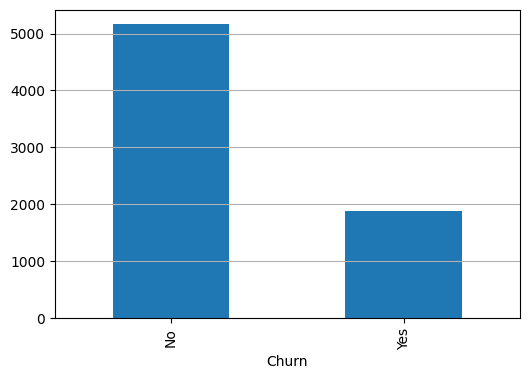

In [14]:
data['Churn'].value_counts().plot.bar(figsize=(6,4))
plt.grid(axis='y')
plt.show()

In [15]:
data['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

Если прикинуть наш **baseline** качества, с которым можно будет сравнивать результаты работы модели. У нас 73% одного класса и 27% другого. Если наша модель будет предсказывать только то, что клиент останется (Значение `Churn` = `No`), то `accuracy` будет равна, в среднем, 73%.

## Рассмотрим корреляцию с целевой переменной
- Преобразуем Churn в бинарную

In [16]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

Теперь посмотрим корреляцию с числовыми признаками

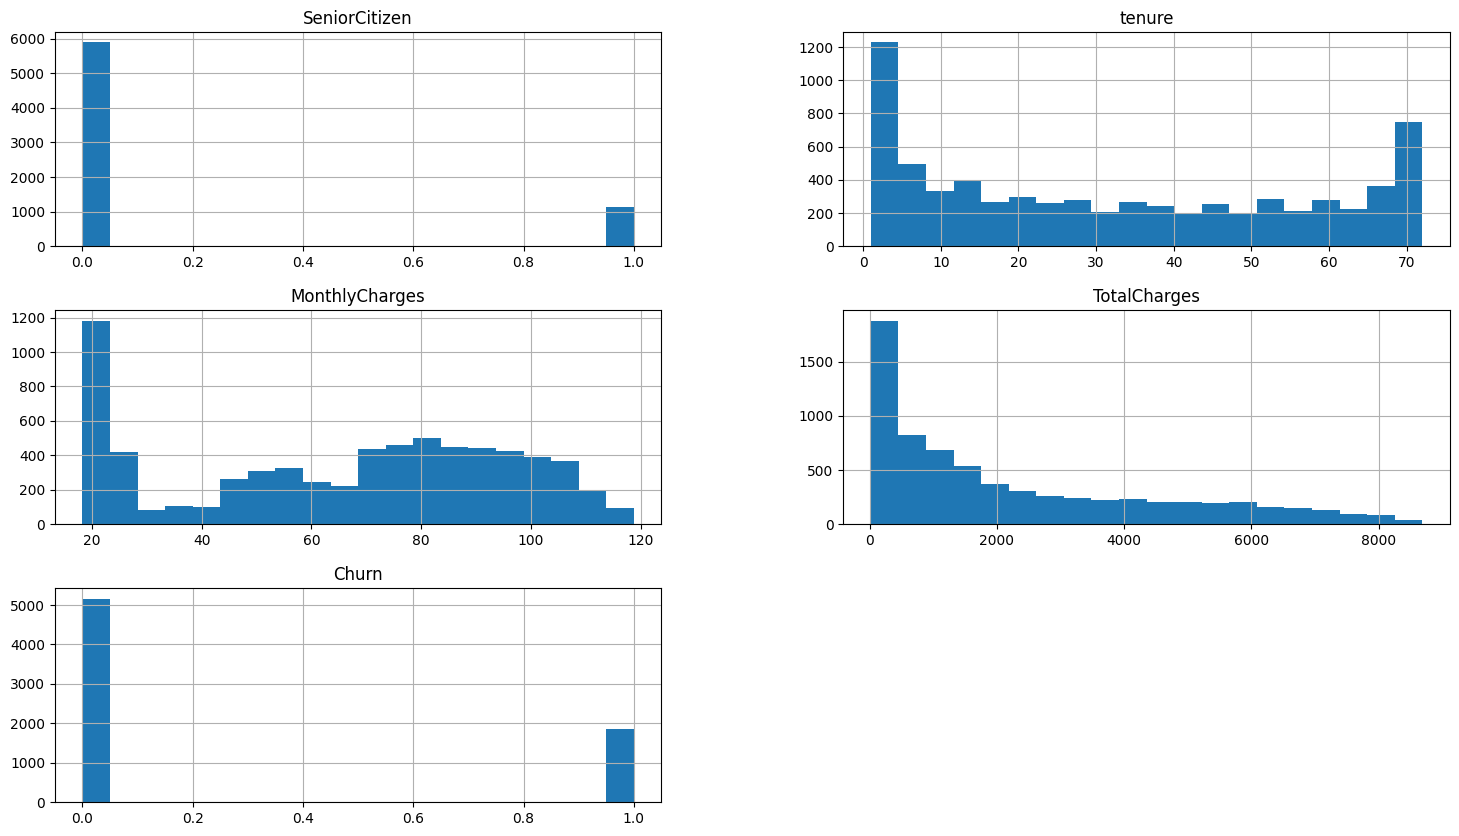

In [17]:
data.hist(figsize=(18, 10), bins=20);

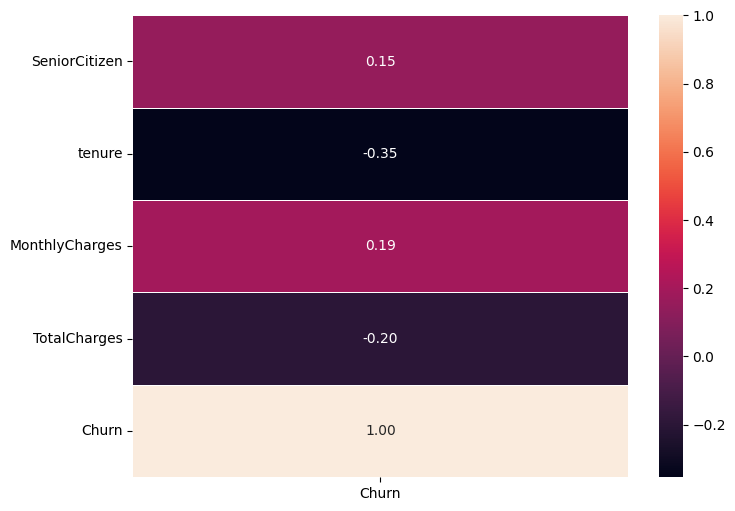

In [18]:
plt.figure(figsize=(8,6))
numeric_cols = data.select_dtypes(include=['number']).columns
corr = data[numeric_cols].corr()[['Churn']]
# print(corr.sort_values(by='Churn', ascending=False))
sns.heatmap(corr,annot=True,cbar=True,linewidths=.5, fmt=".2f")
plt.show()

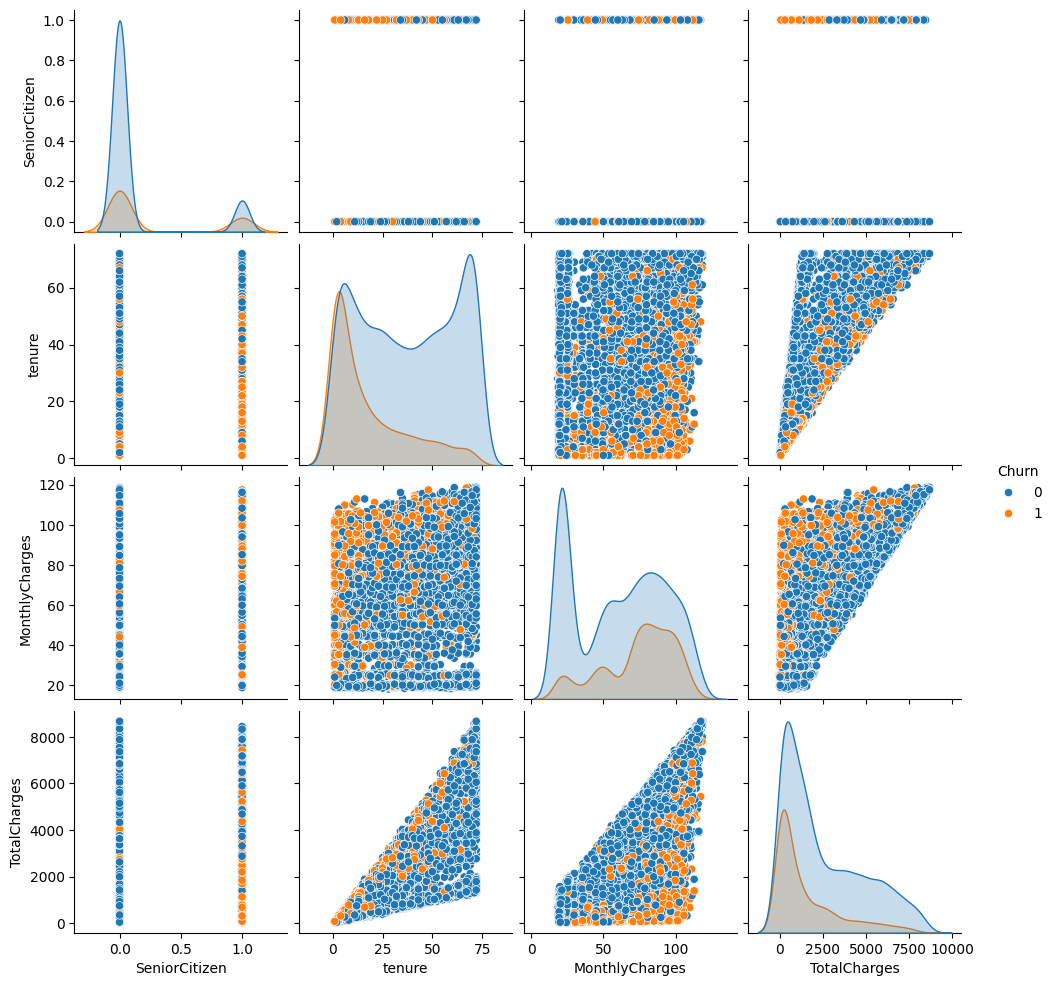

In [19]:
sns.pairplot(data, hue='Churn')

Рассмотрим корреляцию с категориальными признаками

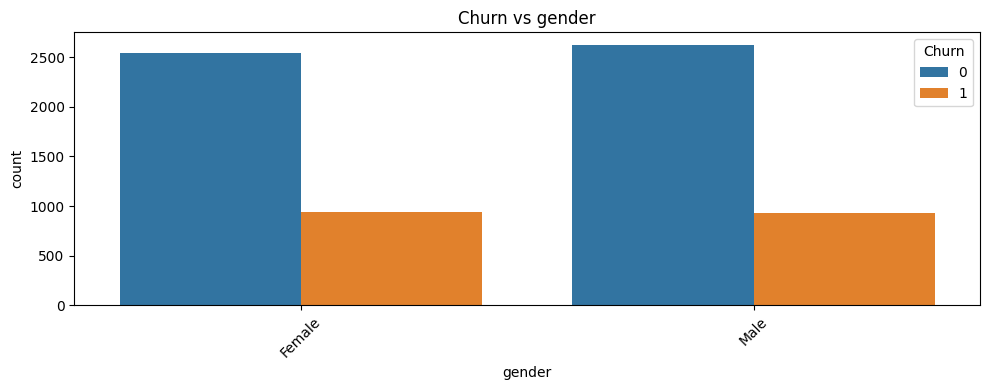

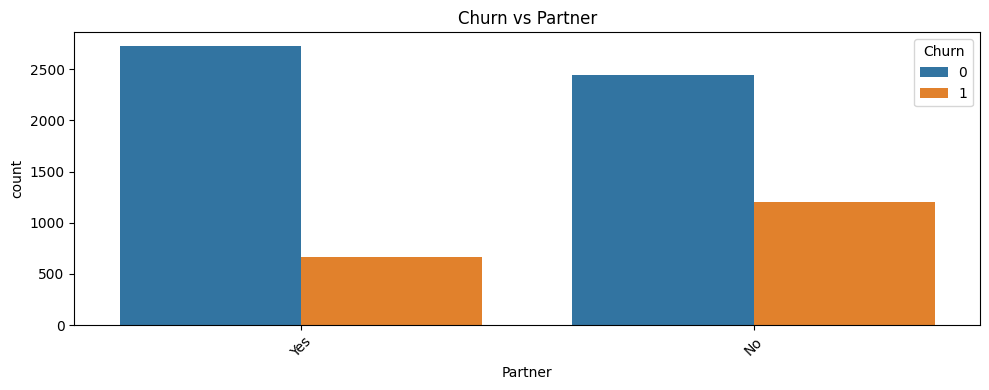

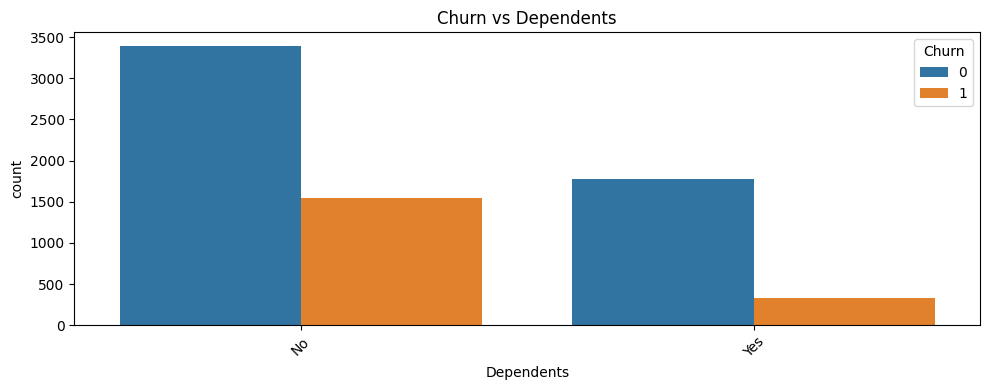

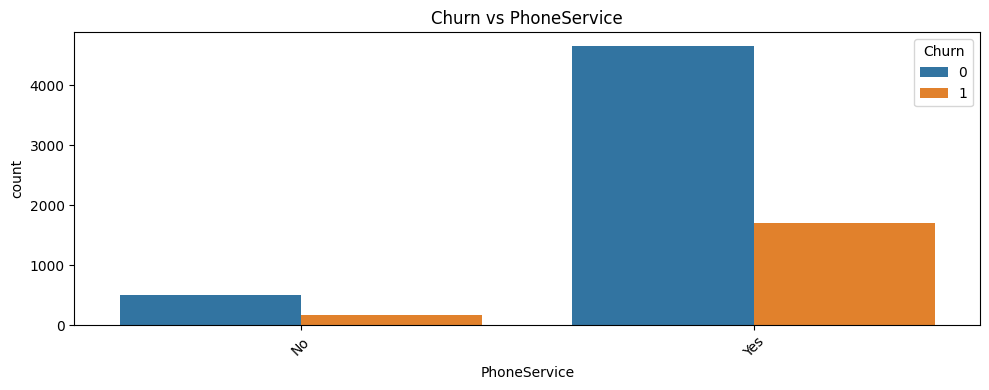

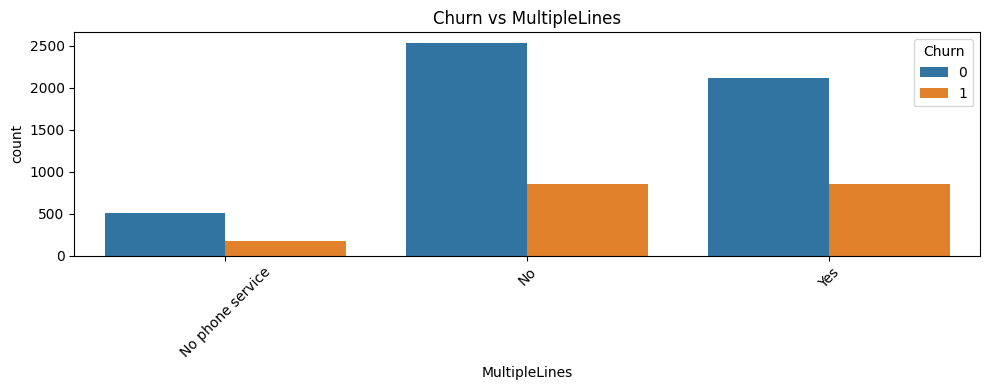

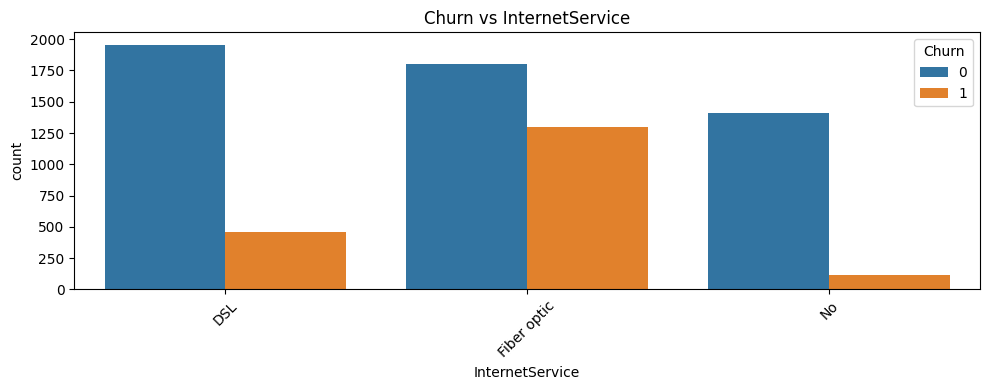

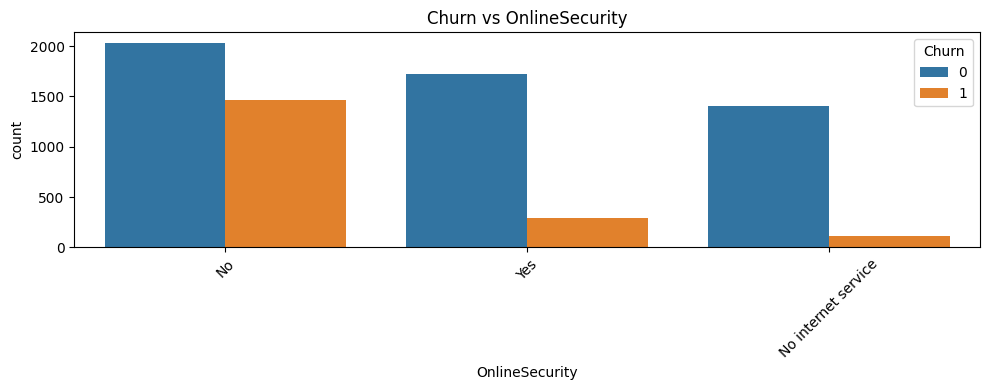

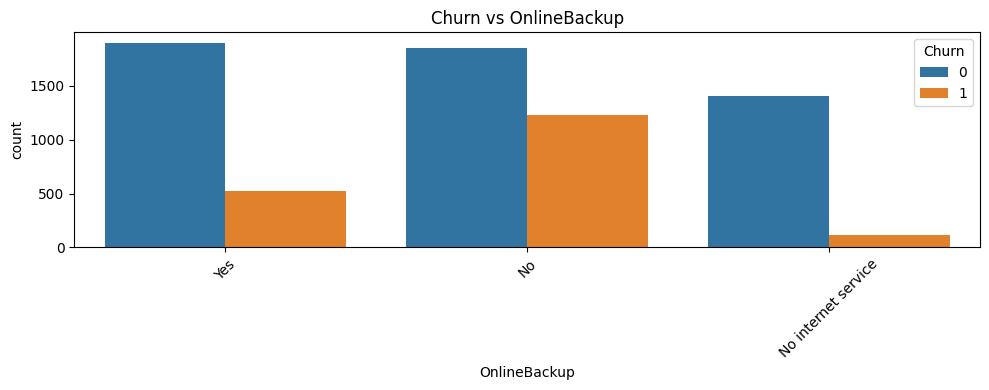

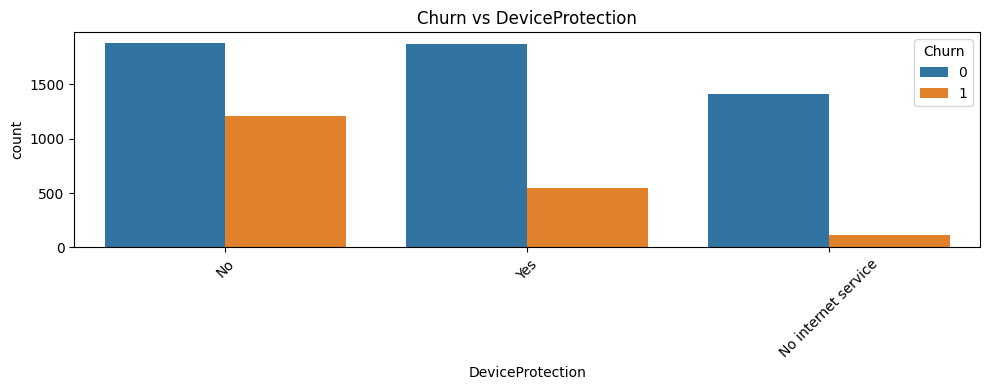

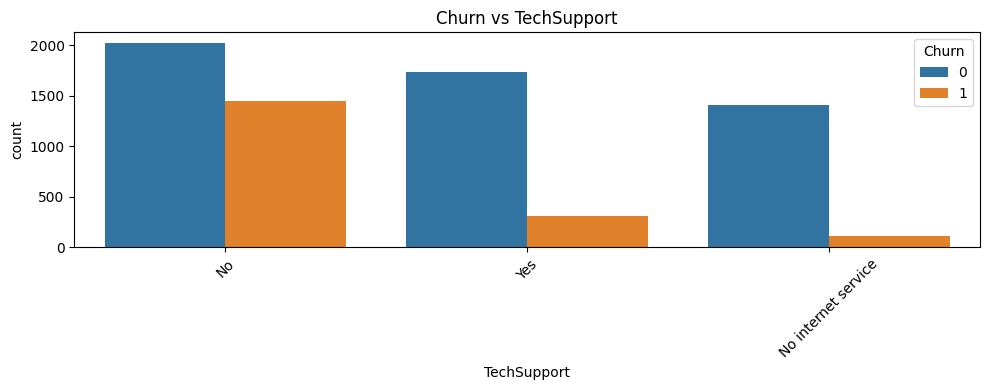

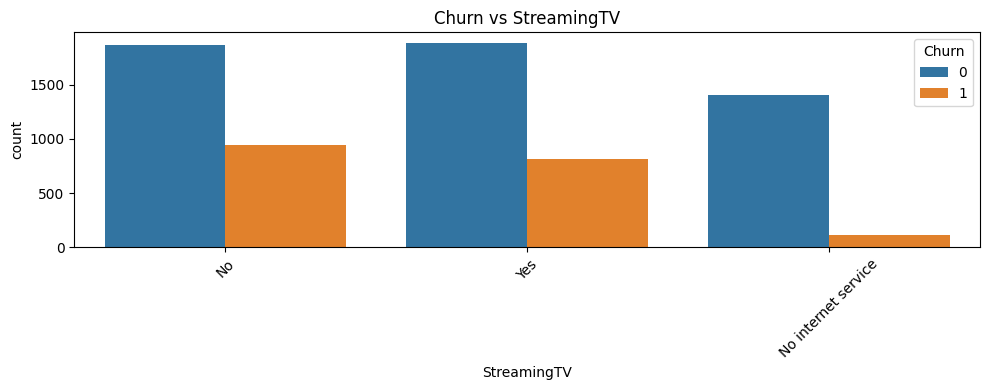

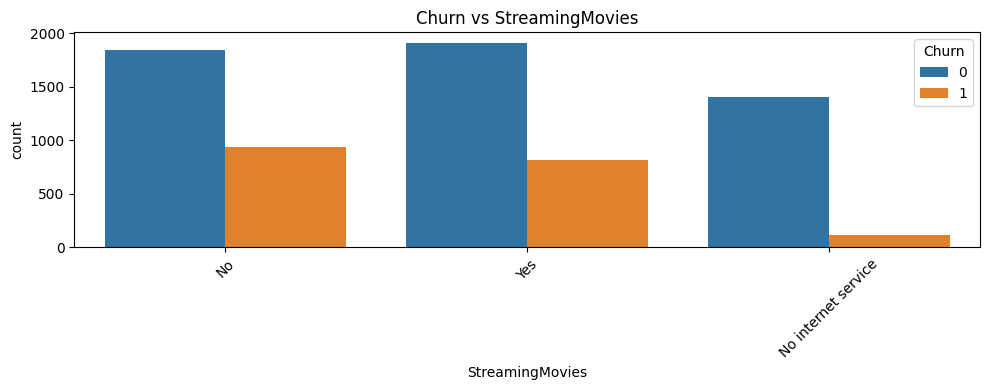

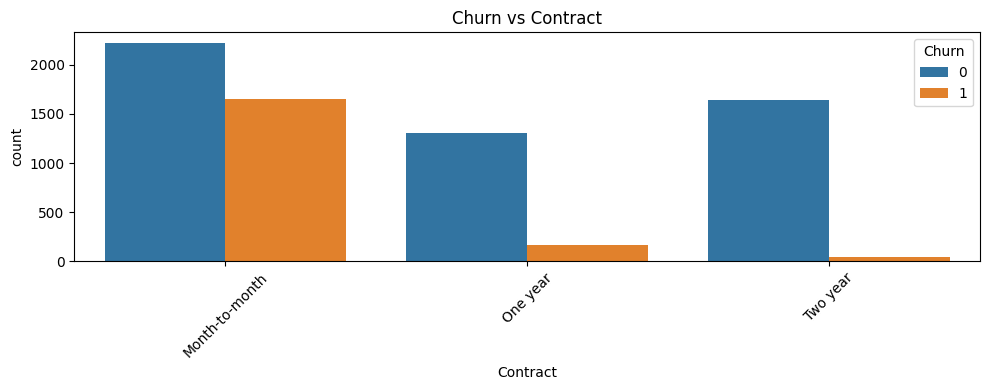

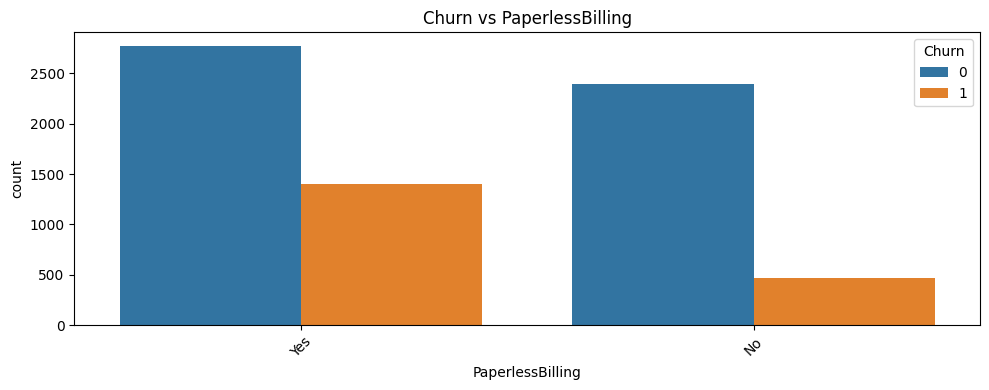

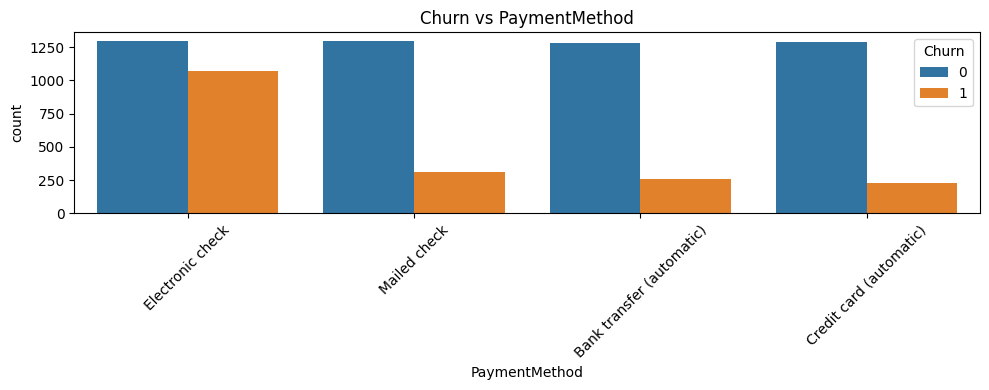

In [20]:
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f'Churn vs {col}')
    plt.tight_layout()
    plt.show()

## Гипотезы и выводы
- Клиенты без контракта чаще уходят.
- Клиенты с более высоким ежемесячным платежом имеют больший риск оттока.
- Новые клиенты чаще уходят.
- Услуги типа "Fiber optic" ассоциируются с более высоким оттоком.



## Часть 2. Preprocessing & Feature Engineering
- В предыдущей части мы уже преобразовали TotalCharges к float64
- Удалили CustomerID
- Далее используем LabelEncoder для категориальных признаков

In [21]:
from sklearn.preprocessing import LabelEncoder

# Выберем все категориальные признаки
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Применим LabelEncoder
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

- Также можем удалить признак gender - он практически не влияет на Churn

In [22]:
data.drop(columns=['gender'], inplace=True, errors='ignore')

# Выбор параметров модели


**Validation set** - в самом начале работы откладываем часть данных и не используем их до внедрения модели в боевое окружение. Это наш финальный и самый верный способ проверить качество готовой модели.

**Training set** - используется для непосредственной тренировки модели, эти данные модель "видит" во время обучения

**Test set** - этот набор даннных модель "не видит" во время тренировки, но мы его используем для настройки гиперпараметров, то есть проверяем качество обученной модели и если мы им недовольны - меняем параметры модели и повторяем процедуру. Таким образом, модель хоть напрямую с этими данными и не работает, информацию из них мы всё равно многократно используем и она просачивается в модель в виде настроенных параметров. Т.е., качество модели на валидационной выборке может быть завышено.


В `sklearn.model_selection` есть функция `train_test_split`, которая случайным (или не очень, если мы того хотим) образом делит выборку на две части. Вместо train и validation их чаще всего (на самом деле всегда) называют train и test, подразумевая, при этом, что истинная "тестовая" выборка хранится отдельно и будет использована в будущем после настройки модели.  

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Churn'], axis=1), data['Churn'], test_size=0.20, random_state=5, stratify=data['Churn']
)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 18), (1407, 18), (5625,), (1407,))

In [59]:
y_train.value_counts(normalize=True)

Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

In [60]:
y_test.value_counts(normalize=True)

Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64

## Итог 2 части
- Все категориальные признаки переведены в числовые
- Удалены нерелевантные признаки
- Данные разделены на обучающую и тестовую выборки с сохранением баланса классов

## Часть 3 сравнение 4 вариантов градиентного бустинга

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [62]:
# Словарь для хранения результатов
results = {}

# 1. Sklearn Gradient Boosting
model_sklearn = GradientBoostingClassifier(random_state=42)
model_sklearn.fit(X_train, y_train)
y_pred = model_sklearn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model_sklearn.predict_proba(X_test)[:, 1])
results['Sklearn GB'] = (acc, roc_auc)

In [63]:
# 2. XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
results['XGBoost'] = (acc, roc_auc)

KeyboardInterrupt: 

In [ ]:
# 3. CatBoost
model_catboost = CatBoostClassifier(silent=True, random_state=42)
model_catboost.fit(X_train, y_train)
y_pred = model_catboost.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model_catboost.predict_proba(X_test)[:, 1])
results['CatBoost'] = (acc, roc_auc)

In [ ]:
# 4. LightGBM
model_lgbm = LGBMClassifier(random_state=42)
model_lgbm.fit(X_train, y_train)
y_pred = model_lgbm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model_lgbm.predict_proba(X_test)[:, 1])
results['LightGBM'] = (acc, roc_auc)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


In [ ]:
# Таблица результатов
results_df = pd.DataFrame(results, index=['Accuracy', 'ROC AUC']).T
print(results_df.sort_values(by='ROC AUC', ascending=False))

            Accuracy   ROC AUC
Sklearn GB  0.794598  0.852684
CatBoost    0.791045  0.846056
LightGBM    0.791756  0.841872
XGBoost     0.778252  0.822695


## Промежуточный итог

 На текущий момент лидирует Sklearn GB, далее проведем настройку гиперпараметров.

In [3]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import *
import joblib

Подберем гиперпараметры для каждой модели

## Sklearn GB
Для метрики  ROC AUC будем подбирать следующие гиперпараметры модели: число деревьев, скорость обучения, глубина деревьев.

In [ ]:
param_grid = {
    'n_estimators' : [1,5,10,100,200,300,400,500,600,700],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'subsample': [0.8, 1.0]
}

# Кросс-валидатор
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = 'roc_auc'


# GridSearch, указываем модель и критерий для оценки качества
grid_search = GridSearchCV(
    estimator=model_sklearn,
    param_grid=param_grid,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Обучение на обучающей выборке
grid_search.fit(X_train, y_train)

# Выведем лучшие результаты
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение ROC AUC на кросс-валидации:", grid_search.best_score_)


Fitting 5 folds for each of 160 candidates, totalling 800 fits


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "/home/krava/EDUCATION/OTUS/ML/.venv/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/home/krava/EDUCATION/OTUS/ML/.venv/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/krava/EDUCATION/OTUS/ML/.venv/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydev

Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100, 'subsample': 1.0}
Лучшее значение ROC AUC на кросс-валидации: 0.8448099799978944


## Лучшие показатели после кросс-валидации:
- Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100, 'subsample': 1.0}
- Лучшее значение ROC AUC на кросс-валидации: 0.8448099799978944

In [ ]:
best_model_sk_gb = grid_search.best_estimator_

y_pred = best_model_sk_gb.predict(X_test)

# ACC
acc = accuracy_score(y_test,y_pred)
print("Accuracy на тестовой выборке:", acc)
#ROC AUC
test_roc_auc = roc_auc_score(y_test,best_model_sk_gb.predict_proba(X_test)[:,1])
print("ROC AUC на тестовой выборке:", test_roc_auc)

results_after = {}
results_after['Sklearn GB'] = (acc, test_roc_auc)



joblib.dump(best_model_sk_gb, 'best_model_sk_gb.pkl')


Accuracy на тестовой выборке: 0.7953091684434968
ROC AUC на тестовой выборке: 0.8548850500333901


['best_model_sk_gb.pkl']

На тестовой выборке ROC AUC следуюший 0.8548850500333901

## CatBoost
Для CatBoost будем настраивать следующие гиперпараметры:
- число деревьев (iterations);
- скорость обучения (learning_rate);
- глубина деревьев (depth);
- сила случайности при построении деревьев (random_strength).
Силу случайности добавила просто по фану. 

In [ ]:
param_grid_cat_boost = {
    'iterations': [50,100, 200,300,400],
    'learning_rate': [0.1, 0.05],
    'depth': [3, 7],
    'random_strength': [1, 5]
}

In [ ]:
# Метрика оценки
scoring_cb = make_scorer(roc_auc_score)

# GridSearch с кросс-валидацией
grid_search = GridSearchCV(
    estimator=model_catboost,
    param_grid=param_grid_cat_boost,
    scoring=scoring_cb,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Обучение на обучающей выборке
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7fbab63e2ed0>,
             n_jobs=-1,
             param_grid={'depth': [3, 7],
                         'iterations': [50, 100, 200, 300, 400],
                         'learning_rate': [0.1, 0.05],
                         'random_strength': [1, 5]},
             scoring=make_scorer(roc_auc_score, response_method='predict'),
             verbose=1)

In [ ]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение ROC AUC на кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1, 'random_strength': 1}
Лучшее значение ROC AUC на кросс-валидации: 0.7187797096050597


In [ ]:
best_model_catboost = grid_search.best_estimator_

y_pred_proba_cb = best_model_catboost.predict_proba(X_test)[:, 1]


#ROC AUC
test_roc_auc = roc_auc_score(y_test,y_pred_proba_cb)
print("ROC AUC на тестовой выборке:", test_roc_auc)
# ACC
y_pred = best_model_catboost.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy на тестовой выборке:", acc)
results_after['CatBoost'] = (acc, test_roc_auc)




joblib.dump(best_model_catboost, 'best_model_catboost.pkl')

ROC AUC на тестовой выборке: 0.8578293325602704
Accuracy на тестовой выборке: 0.7938877043354655


['best_model_catboost.pkl']

## LightGBM
- число деревьев;
- скорость обучения;
- максимальная глубина дерева;
- доля данных обучения каждого дерева.

In [ ]:
param_grid_light_gbm = {
    'n_estimators': [50,100, 200,300,400],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 7]
    # 'bagging_fraction': [0.8, 1.0]
}

In [ ]:
# Метрика оценки
scoring_light_gbm = make_scorer(roc_auc_score)

In [ ]:
# GridSearch с кросс-валидацией
grid_search_light_gbm = GridSearchCV(
    estimator=model_lgbm,
    param_grid=param_grid_light_gbm,
    scoring=scoring_light_gbm,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Обучение на обучающей выборке
grid_search_light_gbm.fit(X_train, y_train)

print("Лучшие параметры:", grid_search_light_gbm.best_params_)
print("Лучшее значение ROC AUC на кросс-валидации:", grid_search_light_gbm.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Traceback (most recent call last):
  File "/home/krava/EDUCATION/OTUS/ML/.venv/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/home/krava/EDUCATION/OTUS/ML/.venv/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/krava/EDUCATION/OTUS/ML/.venv/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_daemon_thread.py", line 53, in run
    self._on_run()
  File "/home/krava/EDUCATION/OTUS/ML/.venv/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 432, in _on_run
    self.py_db.dispose_and_kill_all_pydevd_threads()
  File "/home/krava/EDUCATION/OT

[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Number of positive: 1196, number of negative: 3304[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.131757 seconds.
You can set `force_row_wise=true` to remove the overhead.
An

In [ ]:
best_model_light_gbm = grid_search_light_gbm.best_estimator_

# Предсказания
y_pred_proba_light_gbm = best_model_light_gbm.predict_proba(X_test)[:, 1]

# ROC AUC
test_roc_auc = roc_auc_score(y_test, y_pred_proba_light_gbm)
print("ROC AUC на тестовой выборке:", test_roc_auc)

# ACC
y_pred = best_model_light_gbm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy на тестовой выборке:", acc)

# results_after['LightGBM'] = (acc, test_roc_auc)



ROC AUC на тестовой выборке: 0.8492980312779869
Accuracy на тестовой выборке: 0.7924662402274343


In [ ]:
joblib.dump(best_model_light_gbm, 'best_model_light_gbm.pkl')

['best_model_light_gbm.pkl']

## XGBoost


In [ ]:
def custom_roc_auc(estimator, X, y):
    try:
        y_proba = estimator.predict_proba(X)[:, 1]
        return roc_auc_score(y, y_proba)
    except:
        return float('-inf')  # или 0.5, чтобы понизить значение

In [ ]:
import sklearn
# Метрика оценки
# scoring_xgb = make_scorer(roc_auc_score, needs_proba=True)
scoring_xgb = make_scorer(roc_auc_score)
param_grid_xgb = {
    'n_estimators': [50,100, 200,300,400],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 7]    
}

cv_xgboost = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# GridSearch с кросс-валидацией
grid_search_xgb = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid_xgb,
    scoring=scoring_xgb,
    cv=cv_xgboost,
    n_jobs=-1,
    verbose=1
)

# Обучение на обучающей выборке
grid_search_xgb.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 7],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring=make_scorer(roc_auc_score, response_method='predict'),
             verbose=1)

In [ ]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение ROC AUC на кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1, 'random_strength': 1}
Лучшее значение ROC AUC на кросс-валидации: 0.7187797096050597


In [ ]:
best_model_xgboost = grid_search_xgb.best_estimator_

# Предсказания
y_pred_proba_grid_search_xgb = best_model_xgboost.predict_proba(X_test)[:, 1]

# ROC AUC
test_roc_auc = roc_auc_score(y_test, y_pred_proba_light_gbm)
print("ROC AUC на тестовой выборке:", test_roc_auc)

# ACC
y_pred = best_model_xgboost.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy на тестовой выборке:", acc)

results_after['XGBoost'] = (acc, test_roc_auc)


ROC AUC на тестовой выборке: 0.8492980312779869


In [ ]:
joblib.dump(best_model_xgboost, 'best_model_xgboost.pkl')
  

['best_model_xgboost.pkl']

In [2]:
from pathlib import Path
# Загружает все .pkl модели
models_path = Path("./")
model_files = list(models_path.glob('*.pkl'))

if not model_files:
    raise FileNotFoundError(f"В папке не найдено моделей с расширением .pkl")

print(f"Найдено {len(model_files)} моделей:")
models = {}
for model_file in model_files:
    model_name = model_file.stem
    try:
        model = joblib.load(model_file)
        models[model_name] = model
        print(f"Загружена модель: {model_name}")
    except Exception as e:
        print(f"Ошибка при загрузке {model_file}: {e}")


Найдено 4 моделей:
Ошибка при загрузке best_model_sk_gb.pkl: name 'joblib' is not defined
Ошибка при загрузке best_model_xgboost.pkl: name 'joblib' is not defined
Ошибка при загрузке best_model_light_gbm.pkl: name 'joblib' is not defined
Ошибка при загрузке best_model_catboost.pkl: name 'joblib' is not defined


In [1]:
results = {}

# z = models["best_model_sk_gb"]
# try: 
#     z.predict_proba(X_test)[:, 1]
#     test_roc_auc = roc_auc_score(y_test, model)
#     acc = accuracy_score(y_test, y_pred)
    
#     print(f"Предсказание выполнено моделью: {model_name} {acc} {test_roc_auc}")
# except Exception as e:
#     print(f"Ошибка предсказания best_model_sk_gb {model_name}: {e}")


for model_name, model in models.items():
    try:
        y_pred_p = model.predict_proba(X_test)[:, 1]
        test_roc_auc = roc_auc_score(y_test, y_pred_p)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[model_name] = (acc,test_roc_auc)            
        print(f"Предсказание выполнено моделью: {model_name}")
    except Exception as e:
        print(f"Ошибка предсказания моделью {model_name}: {e}")

# Таблица результатов
results_df = pd.DataFrame(results, index=['Accuracy', 'ROC AUC']).T
print(results_df.sort_values(by='ROC AUC', ascending=False))


NameError: name 'models' is not defined

## Итог
После подбора гиперпараметров места по метрике ROC AUC распределились следующим образом:

| Model                 | Accuracy | ROC AUC   |
|-----------------------|----------|-----------|
| best_model_catboost   |  0.793888|  0.857829 |
| best_model_light_gbm  |  0.793888|  0.857829 |
| best_model_sk_gb      |  0.795309|  0.854885 |
| best_model_xgboost    |  0.797441|  0.853358 |

Однако не нашла объяснений почему значения двух первых моделей различаются.